In [2]:
from collections import Counter
from datetime import datetime as dt
import json
import os.path as path
from pprint import pprint
from tqdm import tqdm

import matplotlib.pyplot as plt

In [3]:
# directories
data_dir = "../tiktok-data"

## Initial exploration

In [4]:
# load data
filepath = path.join(data_dir, "2022-01-17_0059/antiwork_1642377633704.json")
with open(filepath, 'r') as f:
    data = json.load(f)

# peek at available metadata
print(set(data[0].keys()))

{'covers', 'musicMeta', 'videoMeta', 'videoUrlNoWaterMark', 'playCount', 'webVideoUrl', 'videoUrl', 'authorMeta', 'effectStickers', 'secretID', 'text', 'diggCount', 'downloaded', 'shareCount', 'mentions', 'commentCount', 'createTime', 'videoApiUrlNoWaterMark', 'id', 'hashtags'}


100%|██████████| 1134/1134 [00:00<00:00, 82928.09it/s]


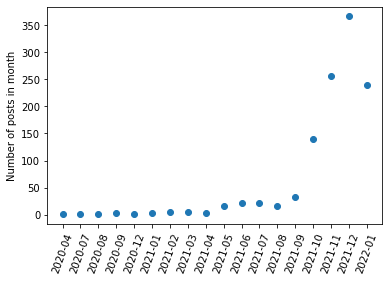

In [5]:
# get range of timestamps of posts
timestamps = []
for x in tqdm(data):
    timestamp = dt.fromtimestamp(x['createTime']).strftime("%Y-%m")
    timestamps.append(timestamp)

# plot
x, y = zip(*Counter(sorted(timestamps)).items())
plt.plot_date(x, y,)
plt.ylabel("Number of posts in month")
plt.xticks(rotation=70, ha="center")
plt.show()

/tmp/ipykernel_74747/1043253375.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=70, ha="center")
/tmp/ipykernel_74747/1043253375.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=70, ha="center")
/tmp/ipykernel_74747/1043253375.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=70, ha="center")


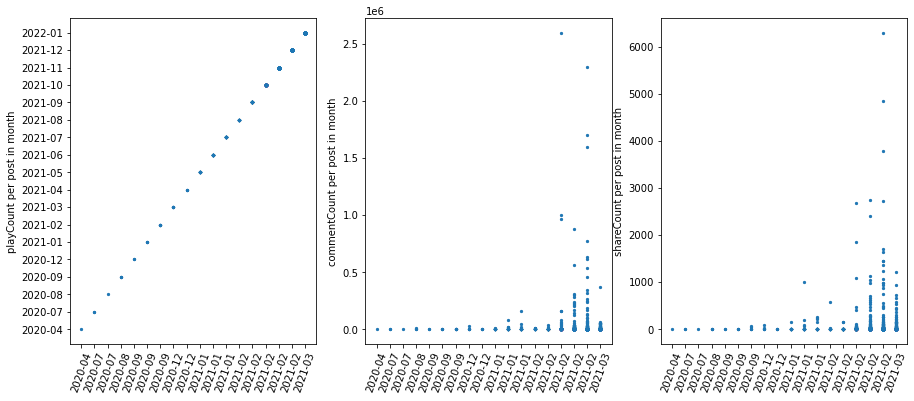

In [6]:
# play count, comment count, share count over time
keys = ['playCount', 'commentCount', 'shareCount']
timestamp_to_counts = [
    [dt.fromtimestamp(x['createTime']).strftime("%Y-%m")] + [x[k] for k in keys]
    for x in data]
timestamp_to_counts = sorted(timestamp_to_counts, key=lambda x: x[0])

# plots
f, ax = plt.subplots(1, 3, figsize=(15,6))
x = [_[0] for _ in timestamp_to_counts]
for i, key in enumerate(keys):
    y = [_[i] for _ in timestamp_to_counts]
    ax[i].scatter(x, y, s=5)
    ax[i].set_ylabel(f"{key} per post in month")
    ax[i].set_xticklabels(x, rotation=70, ha="center")
plt.show()

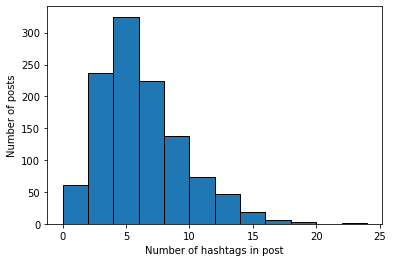

Number of hashtags used alongside #antiwork: 2016
Examples:
[('antiwork', 1134),
 ('fyp', 217),
 ('leftist', 112),
 ('anticapitalism', 103),
 ('antiworktiktok', 101),
 ('work', 89),
 ('capitalism', 81),
 ('socialism', 73),
 ('fypシ', 66),
 ('9to5', 59)]


In [79]:
# what hashtags are used alongside #antiwork?
hashtags = [set([_['name'] for _ in x['hashtags']]) for x in data]
plt.hist([len(_) for _ in hashtags], edgecolor="black", bins=range(0,25,2))
plt.xlabel("Number of hashtags in post")
plt.ylabel("Number of posts")
plt.show()

hashtags = [_ for _hashtags in hashtags for _ in _hashtags]
hashtags = Counter(hashtags)
print(f"Number of hashtags used alongside #antiwork: {len(hashtags) - 1}")
print("Examples:")
pprint(hashtags.most_common(10))